# **Problem 1**

This exercise involves the Auto data set. Make sure that the missing values have been removed from
the data.

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
uploaded=files.upload()

Saving Auto.csv to Auto.csv


In [ ]:
for fn in uploaded.keys():
 print('file"{name}" length{length}'.format(name=fn,length=len(uploaded[fn])))
Auto=pd.read_csv(io.StringIO(uploaded['Auto.csv'].decode('utf-8')))

file"Auto.csv" length19339


In [ ]:
Auto.dropna(how='any')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Column1
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Column1
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**a. Which of the predictors are quantitative, and which are qualitative?**

**Quantitative:**
*   mpg
*   displacement
*   horsepower
*   weight
*   acceleration.
*   cylinders
*   year

**Qualitative**
*   origin
*   name 

**b. What is the range (e.g., minimum and maximum) of each quantitative predictor?**

In [ ]:
auto_max=Auto.loc[:,"mpg":"year"].max(axis=0)
auto_min=Auto.loc[:,"mpg":"year"].min(axis=0)
auto_range=auto_max-auto_min
pd.DataFrame({"Max":auto_max,"Min":auto_min,"Range":auto_range})

,Max,Min,Range
mpg,397.0,1.0,396.0
cylinders,46.6,9.0,37.6
displacement,8.0,3.0,5.0
horsepower,455.0,68.0,387.0
weight,230.0,46.0,184.0
acceleration,5140.0,1613.0,3527.0
year,24.8,8.0,16.8


**c. What is the mean and standard deviation of each quantitative predictor?**

In [ ]:
auto_mean=Auto.loc[:,"mpg":"year"].mean(axis=0)
auto_stdDev=Auto.loc[:,"mpg":"year"].std(axis=0)
pd.DataFrame({"Mean":auto_mean,"Standard Deviation":auto_stdDev})

,Mean,Standard Deviation
mpg,198.520408,114.438067
cylinders,23.445918,7.805007
displacement,5.471939,1.705783
horsepower,194.411990,104.644004
weight,104.469388,38.491160
acceleration,2977.584184,849.402560
year,15.541327,2.758864


**d. Now remove the 10th through 85th observations.  What is the range, mean, and standarddeviation of each predictor in the subset of the data that remains?**

In [ ]:
Auto.reset_index(drop = True, inplace = True)
auto_dropped = Auto.drop(index = list(range(9, 85)))
dropped_max = auto_dropped.loc[:, "mpg":"year"].max(axis = 0)
dropped_min = auto_dropped.loc[:, "mpg":"year"].min(axis = 0)
dropped_range = dropped_max - dropped_min
dropped_mean = auto_dropped.loc[:, "mpg":"year"].mean(axis = 0)
dropped_sd = auto_dropped.loc[:, "mpg":"year"].std(axis = 0)
pd.DataFrame({"max":dropped_max, "min":dropped_min, "range":dropped_range, "mean":dropped_mean, "std dev":dropped_sd})

,max,min,range,mean,std dev
mpg,397.0,1.0,396.0,234.674051,96.811737
cylinders,46.6,11.0,35.6,24.404430,7.867283
displacement,8.0,3.0,5.0,5.373418,1.654179
horsepower,455.0,68.0,387.0,187.240506,99.678367
weight,230.0,46.0,184.0,100.721519,35.708853
acceleration,4997.0,1649.0,3348.0,2935.971519,811.300208
year,24.8,8.5,16.3,15.726899,2.693721


**e. Using the full data set, investigate the predictors graphically, using scatterplots or othertools of your choice.  Create some plots highlighting the relationships among the predictors.  Com-ment on your findings.**

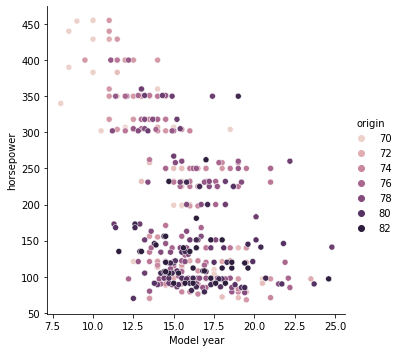

In [ ]:
plot = sns.relplot(x = "year", y = "horsepower", hue = "origin", data = Auto)
plot.set(xlabel = "Model year", ylabel = "horsepower")
plt.show()

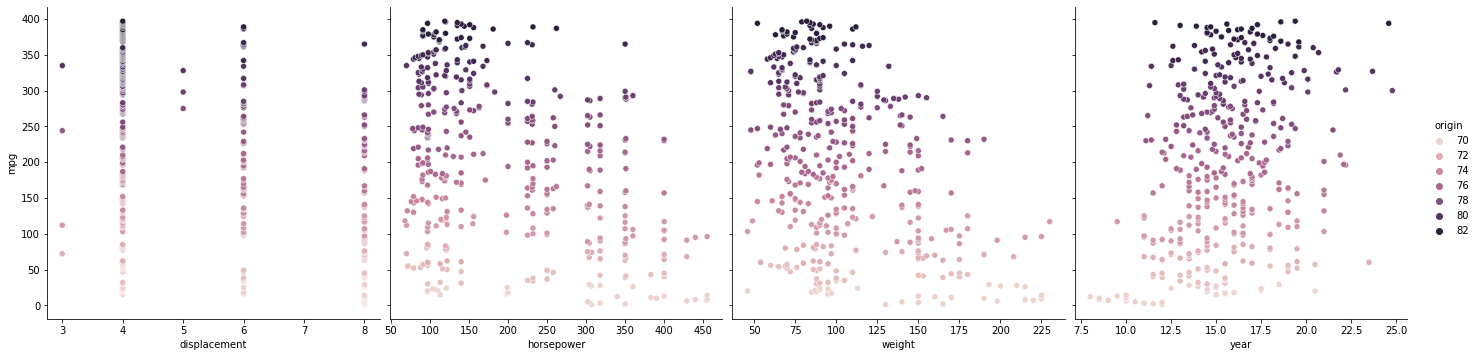

In [ ]:
graph = sns.pairplot(Auto, hue = "origin", y_vars = ["mpg"], x_vars = ["displacement", "horsepower", "weight", "year"],
                height = 5)

we see that there aren't any strong relationships. There are still some weak relationships, such as max engine displacement, car weight, and horsepower generally decreasing over years

**f.  Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables.Do your plots suggest that any of the other variables might be useful in predicting mpg?  Justifyyour answer.**

Based on the scatter plots in e. which relate mpg to the predictors displacement, horsepower, weight, and  year, it seems these factors would be most helpful in predicting mpg.

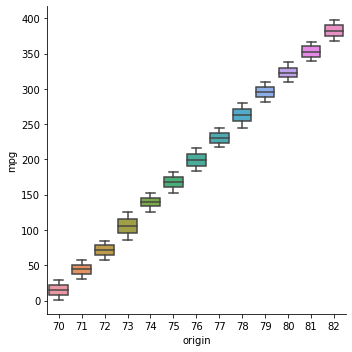

In [ ]:
originplot = sns.catplot(x = "origin", y = "mpg", data = Auto, kind = "box")

Based on above box plot we can conclude that car with origin 82 because of hign mpg is most efficent. and car with origin 70 is less efficent. 
Origin might be helpful while predicting mpg